# Primeros pasos con Pandas

## Instalación e Importación

Como siempre podemos realizar la instalación en nuestro entorno virtual (anaconda o venv) con los siguientes comandos:



```
conda install pandas
```

```
pip install pandas
```

De manera alternativa, si estamos usando cuadernos jupyter en nuestro entorno de desarrollo podemos ejecutar este código en una de sus celdas:

```
!pip install pandas
```

```
%pip install pandas
```

El carácter **'!'** al inicio de la ejecución de una celda hace como si estuviera en una terminal.



# Núcleo de los componentes de Pandas: Series y DataFrames

Los dos componentes principales del módulo de Pandas son las **Series** y los **Dataframes**

Podemos decir que una **Serie** es esencialmente una columna, y que un **Dataframe** es una tabla multidimensional creada a partir de una colección de **Series**

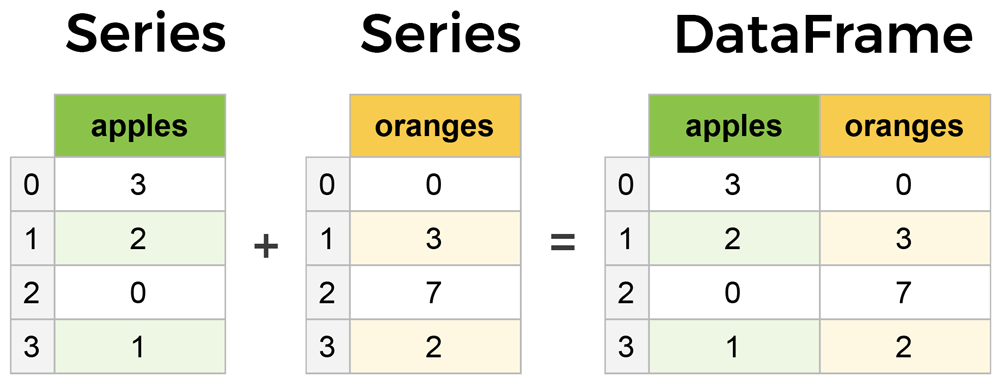

Tanto Series como DataFrames se comportan de manera similar en cuanto a las operaciones que podemos realizar con dichas estructuras. Todas las operaciones que podemos hacer en una las podemos implementar en la otra como por ejemplo crear estructuras rellenando las celdas con valores nulos o calculando la media.

Veamos como trabajar con estos elementos:

# Ejemplos utilizando librería Pandas



Empezamos importando la librería Pandas y numpy

In [ ]:
import pandas as pd
import numpy as np


## Creación de Series

Para crear este tipo de estructura usaremos el método **Series()** de nuestro módulo de Pandas que entre otros tipos de datos serializables admite como parámetro un array para su creación.

Por ejemplo:

In [ ]:
apples = pd.Series([3,2,0,1])

apples

0    3
1    2
2    0
3    1
dtype: int64

Podemos hacer lo mismo con la otra seríe del ejemplo inicial:

In [ ]:
oranges = pd.Series([0,3,7,2])

oranges

0    0
1    3
2    7
3    2
dtype: int64

### Creación de una Serie a partir de un Diccionario

Supongamos que tenemos un puesto de frutas que vende manzanas y naranjas y queremos estructurar la información de manera que, tengamos una columna para cada fruta y una fila para cada compra de cliente.

Para organizar esto como un diccionario en pandas podríamos hacer algo así:



In [ ]:
data = {'apples': [3,2,0,1]}

Solo nos quedaría pasarle este diccionario como parámetro al método

In [ ]:
apples = pd.Series(data)

apples

apples    [3, 2, 0, 1]
dtype: object

## Propiedades de un Serie

+ size: Devuelve el número de elementos de la serie
+ index: Devuelve una lista con los nombres de las filas de la estructura
+ dtype: Devuelve el tipo de datos de los elementos de la serie

In [ ]:
numbers = pd.Series([1,2,3,4,5,6,7,8,9,10])

numbers.index


RangeIndex(start=0, stop=10, step=1)

In [ ]:
numbers2 = pd.Series([2,4,6,8,10,12])

numbers2.index

#print(type(numbers2.index))

RangeIndex(start=0, stop=6, step=1)

In [ ]:
numbers.size

10

In [ ]:
numbers.dtype

dtype('int64')

## Acceso a los elementos de una Serie

Podemos emplear los mismos wildcard que hemos venido usando en las listas de Python.

Por ejemplo:

In [ ]:
print(numbers[1:4])

print(numbers[1::2])

print(numbers[::-1])

1    2
2    3
3    4
dtype: int64
1     2
3     4
5     6
7     8
9    10
dtype: int64
9    10
8     9
7     8
6     7
5     6
4     5
3     4
2     3
1     2
0     1
dtype: int64


Si la serie está creada a partir de un diccionario, debemos recordar que en este caso nos referiremos al valor de su key para localizar los elementos:


In [ ]:
colors = pd.Series({
    'color1': 'orange',
    'color2': 'green',
    'color3': 'blue'
})

print(colors['color2'])

green


## Operaciones con Series

Veamos algunas operaciones que podemos realizar con este tipo de estructuras:

In [ ]:
numbers * 2 #Devuelve todos los elementos de la serie multiplicados por 2

0     2
1     4
2     6
3     8
4    10
5    12
6    14
7    16
8    18
9    20
dtype: int64

In [ ]:
numbers.sum()

55

In [ ]:
print(numbers.max())
print(numbers.min())

10
1


In [ ]:
# Uso de métodos estadísticos
# Desviación estándar
print(numbers.std())

3.0276503540974917


In [ ]:
#Resumen del contenido de nuestra serie
print(numbers.describe())

count    10.00000
mean      5.50000
std       3.02765
min       1.00000
25%       3.25000
50%       5.50000
75%       7.75000
max      10.00000
dtype: float64


Hagamos algún ejemplo más, esta vez usando como estructura un nuevo diccionario:

In [ ]:
subjects = pd.Series({
    'PIA': 10,
    'MAA': 7,
    'SIA': 9,
    'SBD': 9,
    'BDA': 6

})

Podemos filtrar lo que queremos sacar por pantalla a partir de un valor específico:


In [ ]:
print(subjects[subjects > 7])

PIA    10
SIA     9
SBD     9
dtype: int64


También podemos ordenar los elementos de la serie:

In [ ]:
print(subjects.sort_values())

print(type(subjects.sort_values()))

BDA     6
MAA     7
SIA     9
SBD     9
PIA    10
dtype: int64
<class 'pandas.core.series.Series'>


In [ ]:
print(subjects.sort_index(ascending=True)) #Ordenación Alfabética por nombre de materia

BDA     6
MAA     7
PIA    10
SBD     9
SIA     9
dtype: int64


Podemos automatizar más la creación de series, por ejemplo empleando un **valor escalar**:

In [ ]:
# Creamos una serie de tamaño 10 cuyos valores sean 3 por ejemplo.
serie = pd.Series(3, index=range(1,11))

serie

serie2 =  pd.Series(np.arange(0, 50, 5), index=range(1,11))

serie2

serie3 = pd.Series(np.arange(0, 10, 5), index={'bero', 'quintuple'})

serie3

bero         0
quintuple    5
dtype: int64

De igual modo podemos generar la serie a partir de un índice pre-definido:

In [ ]:
data = [14,7,6,6,5,4,3,3,2,2,1]
index = ['Real Madrid', 'AC Milan', 'Liverpool', 'Bayern Munich', 'Barcelona',
         'Ajax', 'Inter de Milán', 'ManUTD', 'Chelsea', 'Juventus', 'ManCity']

winners = pd.Series(data, index=index)

winners

Real Madrid       14
AC Milan           7
Liverpool          6
Bayern Munich      6
Barcelona          5
Ajax               4
Inter de Milán     3
ManUTD             3
Chelsea            2
Juventus           2
ManCity            1
dtype: int64

Con esto ya estamos preparados para generar nuestros primeros DataFrames

# Dataframes en Pandas

Para entender cómo generamos un DataFrame con Pandas, lo comparamos con una lista convencional

In [ ]:
mylist = np.array([1,2,3,4,5])
print("mylist:")
print(mylist)



mylist:
[1 2 3 4 5]


In [ ]:
mydf1 = pd.DataFrame(mylist)
print("mydf1:")
mydf1

mydf1:


,0
0,1
1,2
2,3
3,4
4,5


El nuevo dataframe creado, tiene índices de filas y de columnas.
Probamos a generar uno desde un array de dos dimensiones (una matriz)

In [ ]:
myarray = np.array([[10,30,20], [50,40,60],[1000,2000,3000]])
print("myarray:")
print(myarray)
print()


myarray:
[[  10   30   20]
 [  50   40   60]
 [1000 2000 3000]]



In [ ]:
mydf2 = pd.DataFrame(myarray)
print("mydf2:")
mydf2

mydf2:


,0,1,2
0,10,30,20
1,50,40,60
2,1000,2000,3000


In [ ]:
#Otra variante usando Numpy
mydf3 = pd.DataFrame(np.random.rand(4,3), columns=['a', 'b', 'c'])

print(mydf3)

          a         b         c
0  0.661707  0.718344  0.559617
1  0.594431  0.840218  0.728236
2  0.507968  0.888984  0.703670
3  0.269993  0.272817  0.208284


En los elementos anteriores, se aprecia que los dataframes de pandas ponen claves de filas y columnas por defecto, que serán números si no damos otro tipo de claves. Vamos a crear un df ahora en forma de diccionario:

In [ ]:
data = {
    'name': ['Raúl', 'Miguel Ángel', 'Manu', 'Jorge', 'Pablo'],
    'age': [28, 30, 43, 24, 23],
    'email': ['raul@gmail.com', 'ma@gmail.com', 'manu@gmail.com', 'jorge@gmail.com', 'pablo@gmail.com']
}


students = pd.DataFrame(data=data)

print(students)

           name  age            email
0          Raúl   28   raul@gmail.com
1  Miguel Ángel   30     ma@gmail.com
2          Manu   43   manu@gmail.com
3         Jorge   24  jorge@gmail.com
4         Pablo   23  pablo@gmail.com


También podemos crear las series en forma de Diccionario y luego pasárselas al Dataframe como en el ejemplo siguiente:

In [ ]:
names = pd.Series(['SF', 'San Jose', 'Sacramento'])
sizes = pd.Series([852469, 1015785, 485199])
df = pd.DataFrame({ 'Cities': names, 'Size': sizes })
df

,Cities,Size
0,SF,852469
1,San Jose,1015785
2,Sacramento,485199


Los índices de las columnas se han tomado a partir de las claves del diccionario. Pero también podemos crear un dataframe desde un array y asignar después los valores de índices de las filas y de las columnas

In [ ]:
myarray = np.array([[10,30,20], [50,40,60],[1000,2000,3000]])
rownames = ['lentejas', 'espinacas', 'cerveza']
colnames = ['enero', 'febrero', 'marzo']
mydf = pd.DataFrame(myarray, index=rownames, columns=colnames)
print("Compras:")
mydf


Compras:


,enero,febrero,marzo
lentejas,10,30,20
espinacas,50,40,60
cerveza,1000,2000,3000


Si solo queremos ver los datos de enero

In [ ]:
print("Compras de enero:")
mydf['enero']

Compras de enero:


lentejas       10
espinacas      50
cerveza      1000
Name: enero, dtype: int64

Si solo nos interesa los datos de cerveza, jejeje. Podemos usar este otro método para filtrar por columna:

In [ ]:
print('Lo que me interesa')
mydf.loc['cerveza']

Lo que me interesa


enero      1000
febrero    2000
marzo      3000
Name: cerveza, dtype: int64

Si queremos saber la cantidad de elementos en cada dimensión:

In [ ]:
print("Número de filas:")
print(mydf.shape[0])
print()
print("Número de columnas:")
mydf.shape[1]

Número de filas:
3

Número de columnas:


3

O ver las dimensiones en conjunto:

In [ ]:
print("Número de filas y columnas:")
print(mydf.shape)

Número de filas y columnas:
(3, 3)


También podemos consultar los nombres o etiquetas de filas o columnas, que son los valores que habíamos asignado a los índices, así como el tipo de valor que son.

In [ ]:
print("Columnas:")
print(mydf.columns)
print()
print("Column types:")
mydf.dtypes

Columnas:
Index(['enero', 'febrero', 'marzo'], dtype='object')

Column types:


enero      int64
febrero    int64
marzo      int64
dtype: object

La función "describe" es muy útil, pues nos devuelve los datos estadísticos principales de la distribución de datos

In [ ]:
print("Valores estadísticos de los datos:")
mydf.describe()

Valores estadísticos de los datos:


,enero,febrero,marzo
count,3.000000,3.000000,3.000000
mean,353.333333,690.000000,1026.666667
std,560.386771,1134.504297,1709.073823
min,10.000000,30.000000,20.000000
25%,30.000000,35.000000,40.000000
50%,50.000000,40.000000,60.000000
75%,525.000000,1020.000000,1530.000000
max,1000.000000,2000.000000,3000.000000


También podemos hacer una representación gráfica básica de los datos

<Axes: >

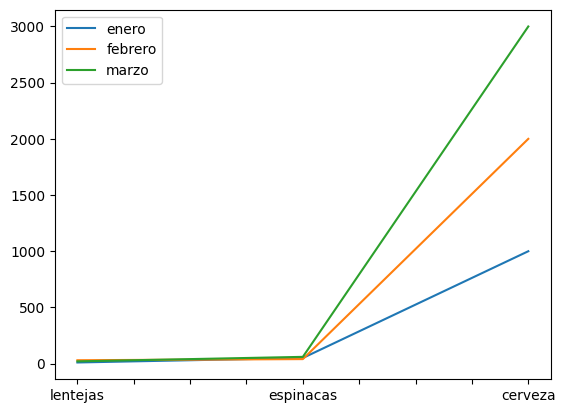

In [ ]:
mydf.plot()

A veces, vamos a necesitar trasponer un dataframe, esto es, cambiar las filas por las columnas, y lo hacemos con la función T

In [ ]:
df1 = pd.DataFrame({'a': [1, 0, 1], 'b': [0, 1, 1] },
dtype=int)
print(df1)
print("df1.T:")
print(df1.T)

   a  b
0  1  0
1  0  1
2  1  1
df1.T:
   0  1  2
a  1  0  1
b  0  1  1


Si lo aplicamos a nuestro dataframe de las compras:

<Axes: >

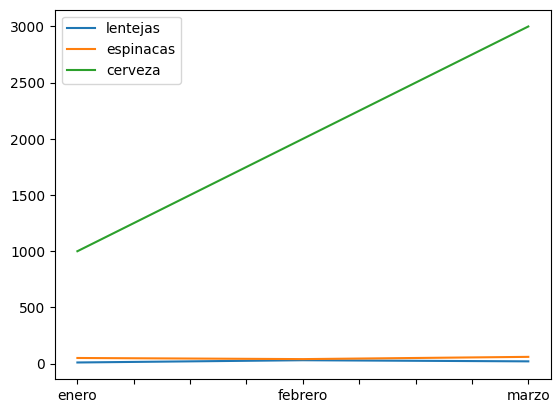

In [ ]:
df = mydf.T
df.plot()

Viendo el gráfico, podemos concluir que vamos a tener que incentivar de alguna manera el consumo de lentejas y espinacas frente al de cerveza 😅

Probemos ahora a sumar dataframes valor a valor

In [ ]:
df1 = pd.DataFrame({'a' : [1, 0, 1], 'b' : [0, 1, 1] },
dtype=int)
df2 = pd.DataFrame({'a' : [3, 3, 3], 'b' : [5, 5, 5] },
dtype=int)
print("df1 + df2:")
print(df1 + df2)

df1 + df2:
   a  b
0  4  5
1  3  6
2  4  6


Algo que vamos a necesitar más de una vez, será convertir datos de tipo categórico a numérico. Esta opción es la más básica, y es adecuada para casos de valores binarios. Puedes descargar el archivo 'spam_no_spam.tsv' necesario para este ejemplo, [aquí](https://drive.google.com/file/d/1o3zlsYxTlU7JyJTzdJF9ClF-AF2-QAGZ/view?usp=sharing)

In [ ]:
df = pd.read_csv('/content/sample_data/spam_no_spam.tsv', delimiter='\t')
print("Primeras cinco líneas:")
print(df.head(5))
print("-------------------------")
# mapeamos no_spam/spam a valores 0/1 respectivamente:
df['type'] = df['type'].map( {'no_spam':0 , 'spam':1} )
print("Primeras cinco líneas despues del cambio:")
print(df.head(5))
print("-------------------------")

Primeras cinco líneas:
      type                          text
0  no_spam  Ya esta disponible su pedido
1  no_spam           Revise sus mensajes
2     spam            Un iPhone gratis!!
3  no_spam           Un 20% de descuento
4  no_spam    Tienes un nuevo comentario
-------------------------
Primeras cinco líneas despues del cambio:
   type                          text
0     0  Ya esta disponible su pedido
1     0           Revise sus mensajes
2     1            Un iPhone gratis!!
3     0           Un 20% de descuento
4     0    Tienes un nuevo comentario
-------------------------


En este otro ejemplo, utilizamos replace para sustituir las categorías de talla de camisetas por el valor numérico. El archivo para este ejemplo, puedes descargarlo [aquí](https://drive.google.com/file/d/1Q2696bRiBilF3DOpmPyFSOBcz2EiJunx/view?usp=sharing). El parámetro regex corresponde a "regular expresions", y aunque suele ser de tipo booleano, en casos como éste, toma como valor una cadena. Si quieres saber más, puedes consultar la [documentación de Pandas sobre la función replace](https://pandas.pydata.org/docs/reference/api/pandas.Series.replace.html).

In [ ]:
shirts = pd.read_csv("shirts.csv")
print("shirts before:")
print(shirts)
print()
shirts['size'] = shirts['size'].replace(regex='xlarge',
value=4)
shirts['size'] = shirts['size'].replace(regex='large',
value=3)
shirts['size'] = shirts['size'].replace(regex='medium',
value=2)
shirts['size'] = shirts['size'].replace(regex='small',
value=1)
print("shirts after:")
print(shirts)

shirts before:
     type     size
0   shirt  xxlarge
1   shirt  xxlarge
2   shirt   xlarge
3   shirt   xlarge
4   shirt   xlarge
5   shirt    large
6   shirt   medium
7   shirt    small
8   shirt    small
9   shirt   xsmall
10  shirt   xsmall

shirts after:
     type  size
0   shirt     4
1   shirt     4
2   shirt     4
3   shirt     4
4   shirt     4
5   shirt     3
6   shirt     2
7   shirt     1
8   shirt     1
9   shirt     1
10  shirt     1


Otras funciones muy útiles son startswith, split, iloc...

Probamos

In [ ]:
shirts = pd.read_csv("shirts.csv")
print("shirts:")
print(shirts)
print()
print("shirts starting with xl:")
print(shirts[shirts['size'].str.startswith('xl')])
print()
print("Exclude 'xlarge' shirts:")
print(shirts[shirts['size'] != 'xlarge'])
print()
print("first three letters:")
shirts['sub1'] = shirts['size'].str[:3]
print(shirts)
print()
print("split ssize on letter 'a':")
shirts['sub2'] = shirts['size'].str.split('a')
print(shirts)
print()
print("Rows 3 through 5 and column 2:")
print(shirts.iloc[2:5, 2])
print()

shirts:
     type     size
0   shirt  xxlarge
1   shirt  xxlarge
2   shirt   xlarge
3   shirt   xlarge
4   shirt   xlarge
5   shirt    large
6   shirt   medium
7   shirt    small
8   shirt    small
9   shirt   xsmall
10  shirt   xsmall

shirts starting with xl:
    type    size
2  shirt  xlarge
3  shirt  xlarge
4  shirt  xlarge

Exclude 'xlarge' shirts:
     type     size
0   shirt  xxlarge
1   shirt  xxlarge
5   shirt    large
6   shirt   medium
7   shirt    small
8   shirt    small
9   shirt   xsmall
10  shirt   xsmall

first three letters:
     type     size sub1
0   shirt  xxlarge  xxl
1   shirt  xxlarge  xxl
2   shirt   xlarge  xla
3   shirt   xlarge  xla
4   shirt   xlarge  xla
5   shirt    large  lar
6   shirt   medium  med
7   shirt    small  sma
8   shirt    small  sma
9   shirt   xsmall  xsm
10  shirt   xsmall  xsm

split ssize on letter 'a':
     type     size sub1        sub2
0   shirt  xxlarge  xxl  [xxl, rge]
1   shirt  xxlarge  xxl  [xxl, rge]
2   shirt   xlarge  xla   [

Se pueden combinar dataframes con concat

In [ ]:
import pandas as pd
can_weather = pd.DataFrame({
"city": ["Vancouver","Toronto","Montreal"],
"temperature": [72,65,50],
"humidity": [40, 20, 25]
})
us_weather = pd.DataFrame({
"city": ["SF","Chicago","LA"],
"temperature": [60,40,85],
"humidity": [30, 15, 55]
})
df = pd.concat([can_weather, us_weather])
print(df)

        city  temperature  humidity
0  Vancouver           72        40
1    Toronto           65        20
2   Montreal           50        25
0         SF           60        30
1    Chicago           40        15
2         LA           85        55


In [ ]:
df.iloc[3]

city           SF
temperature    60
humidity       30
Name: 0, dtype: object

En el siguiente ejemplo, creamos una nueva columna 'Total' que tendrá los valores resultado de sumar los de las otras dos columnas anteriores

In [ ]:
summary = {
'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
'Cost': [-23500, -34000, -57000, -32000],
'Revenue': [40000, 40000, 40000, 40000]
}
df = pd.DataFrame(summary)
print("First Dataset:\n",df)
df['Total'] = df.sum(axis=1)
print("Second Dataset:\n",df)

First Dataset:
   Quarter   Cost  Revenue
0      Q1 -23500    40000
1      Q2 -34000    40000
2      Q3 -57000    40000
3      Q4 -32000    40000
Second Dataset:
   Quarter   Cost  Revenue  Total
0      Q1 -23500    40000  16500
1      Q2 -34000    40000   6000
2      Q3 -57000    40000 -17000
3      Q4 -32000    40000   8000


<ipython-input-115-e78cf6995917>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Total'] = df.sum(axis=1)


En las siguientes celdas, vemos cómo operar, añadir y borrar columnas

In [ ]:
df = pd.DataFrame.from_dict({'A':[1,2,3],'B':[4,5,6]},
orient='index', columns=['one', 'two', 'three'])
print(df)

   one  two  three
A    1    2      3
B    4    5      6


In [ ]:
df['four'] = df['one'] * df['two']
print(df)

   one  two  three  four
A    1    2      3     2
B    4    5      6    20


In [ ]:
df['three'] = df['two'] * df['two']
print(df)

   one  two  three  four
A    1    2      4     2
B    4    5     25    20


In [ ]:
import numpy as np
rand = np.random.randn(2)
df.insert(1, 'random', rand)
print(df)

   one    random  two  three  four
A    1  0.415789    2      4     2
B    4 -0.386212    5     25    20


In [ ]:
df['flag'] = df['one'] > 2
print(df)

   one    random  two  three  four   flag
A    1  0.415789    2      4     2  False
B    4 -0.386212    5     25    20   True


In [ ]:
serie = pd.Series({
    'PIA': 10,
    'MAA': 7,
    'SIA': 3,
    'SBD': 4,
    'BDA': 6

})


df = pd.DataFrame(serie)

def aprobado(x: int):
  if x >= 5:
    return 'Aprobado'
  else:
    return 'Suspenso'

df['Status'] = df[0].apply(aprobado)
print(df)

      0    Status
PIA  10  Aprobado
MAA   7  Aprobado
SIA   3  Suspenso
SBD   4  Suspenso
BDA   6  Aprobado


In [ ]:
del df['two']
print(df)

   one    random  three  four   flag
A    1  0.415789      4     2  False
B    4 -0.386212     25    20   True


In [ ]:
three = df.pop('three')
print(df)

   one    random  four   flag
A    1  0.415789     2  False
B    4 -0.386212    20   True


In [ ]:
df['foo'] = 'bar'
print(df)

   one    random  four   flag  foo
A    1  0.415789     2  False  bar
B    4 -0.386212    20   True  bar
